#importing the libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import glob
tf.enable_eager_execution()

#Downloading the dataset
#####The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. 

In [0]:
(x_train , y_train) , (x_test , y_test) = tf.keras.datasets.mnist.load_data()

#Plotting the images present in training set

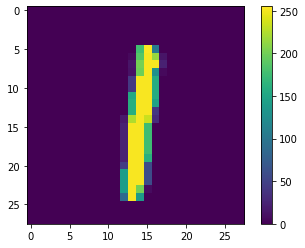

In [3]:
plt.figure()
plt.imshow(x_train[40])
plt.colorbar()
plt.show()

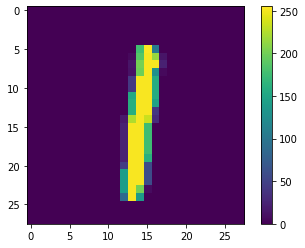

In [4]:
plt.figure()
plt.imshow(x_train[40])
plt.colorbar()
plt.show()

In [0]:
class_names = ["zero" ,"one" , "two" , "three" , "four" , "five" , "six" , "seven" , "eight" , "nine" , ] 

#Plotting the first 15 images

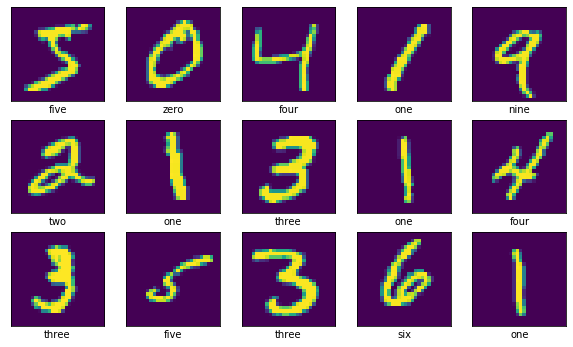

In [6]:
plt.figure(figsize = (10 , 10))
for i in range(15):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
  plt.xlabel(class_names[y_train[i]])
plt.show()

#Normalizing Pixel Values
#####Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1.

In [0]:
x_train = x_train/255.0
x_test = x_test/255.0

#Plotting the images present in training set after normalizing

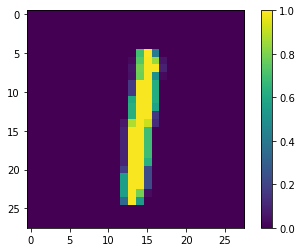

In [8]:
plt.figure()
plt.imshow(x_train[40])
plt.colorbar()
plt.show()

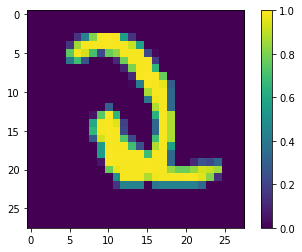

In [9]:
plt.figure()
plt.imshow(x_train[400])
plt.colorbar()
plt.show()

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
len(x_train)

60000

#Shape of x_train
#####28*28 2D structure
#####we need to reshape and flatten it 

In [12]:
x_train[40]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

#Using reshape() function
#####For a multi-layer perceptron model we must reduce the images down into a vector of pixels. In this case the 28×28 sized images will be 784 pixel input values which will act as an input for ANN unlike CNN

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)

In [14]:
x_train.shape

(60000, 784)

#Shape of x_train after using reshape() function
#####784 pixels

In [15]:
x_train[40]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
y_train.shape

(60000,)

In [17]:
y_train[40]

1

#Using tf.keras.utils.to_categorical for output
#####tf.keras..utils.to_categorical is used to convert array of labeled data(from 0 to classes-1) to one-hot vector.

In [0]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [19]:
y_train.shape

(60000, 10)

In [20]:
y_train[40]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

#Constructing the Neural Netwoek
##### A ReLU-activated neural network with four hidden layers with sizes [1000, 1000, 500, 200].

In [0]:
classifier = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, input_shape= (28*28,)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#Compiling the model

In [0]:
classifier.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy'])

#Fitting the model in training set

In [23]:
classifier.fit(x_train, y_train,
          batch_size=64,
          epochs=15,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2264 - acc: 0.9311 - val_loss: 0.1520 - val_acc: 0.9550
Epoch 2/15
60000/60000 [==============================] - 4s 61us/sample - loss: 0.1230 - acc: 0.9628 - val_loss: 0.1425 - val_acc: 0.9602
Epoch 3/15
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0941 - acc: 0.9710 - val_loss: 0.1227 - val_acc: 0.9657
Epoch 4/15
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0816 - acc: 0.9757 - val_loss: 0.1019 - val_acc: 0.9709
Epoch 5/15
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0705 - acc: 0.9788 - val_loss: 0.1040 - val_acc: 0.9717
Epoch 6/15
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0644 - acc: 0.9804 - val_loss: 0.0878 - val_acc: 0.9754
Epoch 7/15
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0580 - acc: 0.9826 - val_loss: 0.

In [0]:
import numpy as np
import tempfile
from numpy import linalg as LA
from shutil import copyfile, move

#Saving the model
#####saving the model HDF5 format(Hierarchical Data Format)
#####Hierarchical Data Format is a set of file formats designed to store and organize large amounts of data

In [0]:
#Save model
_, classifier_file = tempfile.mkstemp('.h5')
tf.keras.models.save_model(classifier, classifier_file, include_optimizer=False)

#Weight Pruning
####Weight pruning means eliminating unnecessary values in the weight tensors.We are practically setting the neural network parameters' values to zero to remove what we estimate are unnecessary connections between the layers of a neural network

In [0]:
import h5py
from scipy.stats import rankdata

In [0]:
#Defining the array for %pruning values
for k in [.25, .50, .60, .70, .80, .90, .95, .97, .99 , .991 , .994 ,.996 , .997, .998, .999]:
  
  #using h5py library which gives a pythonic interface to hdf5 format and it copies the model and opens it in read format
  copyfile(classifier_file,"/tmp/orig.h5")
  file_start = h5py.File("/tmp/orig.h5",'r+')

  values = {}  #array where weights will be stored according to their immportance

  #selecting the weights present in every layer in file_start
  for l in list(file_start['model_weights'])[:-1]:
    data = file_start['model_weights'][l][l]['kernel:0']
  #we need to eliminate the last layer as we cannot prune the last layer

    weights = np.array(data)
  #using np.absolute which is a mathematical function to calculate absolute value of each element
    weights_final = np.absolute(weights)

  #ranking the weight according to their importance by using rankdata library
    values[l]=(rankdata(weights_final,method='dense') - 1).astype(int).reshape(weights.shape)
    v = np.max(values[l])
  #setting up a threshold value for agiven valur of pruning percentage
  #if k = 0.25 , i.e 25%of weights will be removed whhich have the least importance.
    threshold = np.ceil(v*k).astype(int)
  #weights whose value is less than the threshold value will be set to 0
    values[l][values[l] <= threshold]  =  0
  #weights whose value is less than the threshold value will be set to 0
    values[l][values[l] >  threshold]  =  1

    weights = weights*values[l]
  #appending the new weights and saving the model to /tmp/weight_value_k.h5
  data[...] = weights
  file_start.close()
  move("/tmp/orig.h5","/tmp/weight_"+str(k)+".h5")

# Evaluating the model with the new pruned weights

In [0]:
#using glob function of glob library
#lob is a general term used to define technques to match specified pattern according to rules related Unix shell.
f_weights = glob.glob('/tmp/weight*.h5')

#sorting tvalues = {}  #array where weights will be stored according to their immportancehe weights present in files
f_weights.sort()
weight_prun_acc = []

#compiling the new model after lodaing the new pruned weights
for f in f_weights:
  new_classifier = tf.keras.models.load_model(f , compile=False)

  new_classifier.compile(
                        loss=tf.keras.losses.categorical_crossentropy,
                        optimizer='adam',
                        metrics=['accuracy']) 
  
  #evaluating the loss and accuracy of new model
  score = new_classifier.evaluate(x_test, y_test, verbose=0)
#appending the accuracy for every %k pruning
  weight_prun_acc.append(score[1])
 

#List of Accuracies after weight pruning

In [29]:
weight_prun_acc

[0.9772,
 0.976,
 0.9756,
 0.9743,
 0.9705,
 0.9566,
 0.8499,
 0.8143,
 0.4992,
 0.4413,
 0.319,
 0.2832,
 0.2705,
 0.2132,
 0.1081]

#Neuron Pruning
#####Here to achieve sparsity of k% we rank the columns of a weight matrix according to their L2-norm and delete the smallest k%

In [0]:
#Defining the array for %pruning values
for k in [.25, .50, .60, .70, .80, .90, .95, .97, .99]:
  
  #using h5py library which gives a pythonic interface to hdf5 format and it copies the model and opens it in read format
  copyfile(classifier_file,"/tmp/orig.h5")
  file_start = h5py.File("/tmp/orig.h5",'r+')

  values = {}  #array where weights will be stored according to their immportance
  #selecting the weights present in every layer in file_start
  for l in list(file_start['model_weights'])[:-1]:
    data = file_start['model_weights'][l][l]['kernel:0']
  #we need to eliminate the last layer as we cannot prune the last layer

    #finding L2-norm of each weights
    weights = np.array(data)
    norm = LA.norm(weights,axis=0)
    norm = np.tile(norm,(weights.shape[0],1))

  #ranking the weight according to their L2-norm by using rankdata library
    values[l]=(rankdata(norm,method='dense') - 1).astype(int).reshape(norm.shape)
    v = np.max(values[l])

  #setting up a threshold value for agiven valur of pruning percentage
  #if k = 0.25 , i.e 25%of weights will be removed whhich have the least importance.
    threshold = np.ceil(v*k).astype(int)

  #weights whose value is less than the threshold value will be set to 0
    values[l][values[l] <= threshold]  =  0
  
  #weights whose value is less than the threshold value will be set to 0
    values[l][values[l] >  threshold]  =  1

    weights = weights*values[l]

  #appending the new weights and saving the model to /tmp/weight_value_k.h5
    data[...] = weights
  file_start.close()
  move("/tmp/orig.h5","/tmp/neuron"+str(k)+".h5")


#Evaluating the model with new pruned weights

In [0]:
#using glob function of glob library
#glob is a general term used to define techniques to match specified pattern according to rules related Unix shell.
f_neurons = glob.glob('/tmp/neuron*.h5')

#sorting the weights present in files
f_neurons.sort()
neuron_prun_acc = []

#compiling the new model after lodaing the new pruned weights
for f in f_neurons:
  new_classifier_1 = tf.keras.models.load_model(f , compile=False)
  new_classifier_1.compile(
                        loss=tf.keras.losses.categorical_crossentropy,
                        optimizer='adam',
                        metrics=['accuracy']) 
  score = new_classifier_1.evaluate(x_test, y_test, verbose=0)
  neuron_prun_acc.append(score[1])
#appending the accuracy for every %k pruning

# List of Accuracies after neuron pruning

In [32]:
neuron_prun_acc

[0.976, 0.9646, 0.9464, 0.8056, 0.4355, 0.1003, 0.0974, 0.0974, 0.0974]

#Sparsity vs Accuracy graph

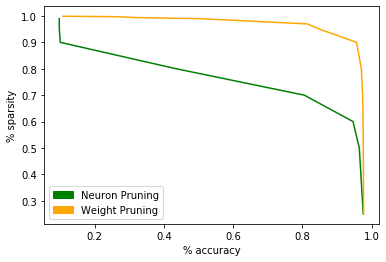

In [33]:

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.xlabel('% accuracy')
plt.ylabel('% sparsity')
green_patch = mpatches.Patch(color='green', label='Neuron Pruning')
orange_patch = mpatches.Patch(color='orange',label='Weight Pruning')
plt.legend(handles=[green_patch,orange_patch],loc='lower left')
plt.plot(neuron_prun_acc,[.25, .50, .60, .70, .80, .90, .95, .97, .99],color='green')
plt.plot(weight_prun_acc,[.25, .50, .60, .70, .80, .90, .95, .97, .99 , .991 , .994 ,.996 , .997, .998, .999],color='orange')
plt.show()